In [26]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
xv=0
def addXV():
  global xv
  xv=xv+1

In [6]:
matrix=np.array([
    [0, 25, 43, 12, 0, 50, 0, 0, 0, 0],    # Distance from city 1 to other cities
    [25, 0, 0, 0, 67, 0, 0, 0, 0, 0],       # Distance from city 2 to other cities
    [43, 0, 0, 0, 0, 0, 0, 0, 0, 0],        # Distance from city 3 to other cities
    [12, 0, 0, 0, 0, 0, 0, 0, 0, 0],        # Distance from city 4 to other cities
    [0, 67, 0, 0, 0, 0, 0, 0, 0, 0],        # Distance from city 5 to other cities
    [50, 0, 0, 0, 0, 0, 80, 0, 0, 0],       # Distance from city 6 to other cities
    [0, 0, 0, 0, 0, 80, 0, 45, 0, 0],       # Distance from city 7 to other cities
    [0, 0, 0, 0, 0, 0, 45, 0, 30, 0],       # Distance from city 8 to other cities
    [0, 0, 0, 0, 0, 0, 0, 30, 0, 20],       # Distance from city 9 to other cities
    [0, 0, 0, 0, 0, 0, 0, 0, 20, 0]         # Distance from city 10 to other cities
])

In [7]:
def r(adjacency_matrix):
  checkArray=[0] * (len(adjacency_matrix))
  print(checkArray)
  u=0
  m=0
  for i in adjacency_matrix:
    u=0
    for j in i:
      if j!=0:
        checkArray[u]=checkArray[u]+1
        checkArray[m]=checkArray[m]+1
      u=u+1
    m=m+1
  print(checkArray)
r(matrix)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 4, 2, 2, 2, 4, 4, 4, 4, 2]


In [8]:
def drawInitialGraph(adjacency_matrix):
  print(adjacency_matrix)
  G = nx.from_numpy_array(adjacency_matrix)
   # Position nodes using the spring layout algorithm
  #nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
  # Set edge weights
  weights = {(i, j): adjacency_matrix[i][j] for i in range(len(adjacency_matrix)) for j in range(len(adjacency_matrix)) if adjacency_matrix[i][j] != 0}
  nx.set_edge_attributes(G, weights, 'weight')
  pos = nx.spring_layout(G)
  # Draw edge labels
  #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

  coordinates_list = []
  for node, coord in pos.items():
      coordinates_list.append((node, coord))

  #TO REMOVE NEGATIVE VALUES FROM coodinates_list
  cord=[]
  min1=0
  min2=0
  for a in coordinates_list:
    print(a[1][0])
    cord.append((a[1][0],a[1][1]))
    if min1 > a[1][0]:
      min1 = a[1][0]
    if min2 > a[1][1]:
      min2 = a[1][1]
  print(cord)

  #TO MAKE COORDINATES OF cord INTEGER NOT FLOAT
  coord=[]
  for a in cord:
    coord.append((int(100*(a[0]+(-min1))),int(100*(a[1]+(-min2)))))
  print("hellllo",coord)

  coordinates={}
  for i, c in enumerate(coord, start=0):
      coordinates[i] = c
  print(coordinates)
  edges = []
  # Iterate over the adjacency matrix to find edges
  for i in range(len(adjacency_matrix)):
      for j in range(i+1, len(adjacency_matrix)):
          if adjacency_matrix[i][j] != 0:
              edge = (coordinates[i], coordinates[j])
              edges.append(edge)

  # Print the list of edges
  print("Edges:")
  for edge in edges:
      print(edge)

  lines = []
  print('-------------------------')
  print(len(edge))
  for tr in range(len(edges)):
    lines.append(edges[tr])
  print(lines)

  rt=["1","2","3","4","5","6","7"]
  ui=0
  # Create a plot
  plt.figure()
  up=0
  for y in coord:
    plt.scatter(y[0], y[1], s=100, color='black')
    plt.text(y[0], y[1],str(up), fontsize=14, color='red', ha='center', va='bottom')
    up=up+1
  # Plot each line and calculate distance
  for line in lines:
      x_values = [point[0] for point in line]
      y_values = [point[1] for point in line]
      plt.plot(x_values, y_values, color='black', marker=None)

      # Calculate distance between points
      distance = np.sqrt((x_values[1] - x_values[0])**2 + (y_values[1] - y_values[0])**2)

      # Display distance on the graph
      x_center = (x_values[0] + x_values[1]) / 2
      y_center = (y_values[0] + y_values[1]) / 2

      plt.text(x_center, y_center,str(int(distance)), ha='center', va='bottom')
      ui=ui+1
  # Hide the axes
  plt.axis('off')

  # Show the plot
  plt.show()

  isItOk = input("is the graph ok? ")
  if isItOk=="1":
    print("We will now save this info ")
    tempEdgeInfo=[]
    for i in range(len(adjacency_matrix)):
          for j in range(len(adjacency_matrix)):
            if adjacency_matrix[i][j]!=0:
              tempEdgeInfo.append({i,j})
    print(tempEdgeInfo)
    color_list = ["black"] * len(adjacency_matrix)
    graphInfo = {
        "nodeCoordinates" : coordinates,
        "EdgeInfo" : tempEdgeInfo,
        "EdgeColor" : color_list
    }
    print(graphInfo)
    return graphInfo
  else:
    drawInitialGraph(adjacency_matrix)


{0: array([0.0607732 , 0.28438343]), 1: array([0.11626525, 0.60881639]), 2: array([-0.11494718,  0.37667003]), 3: array([0.41754873, 0.3296409 ]), 4: array([0.14673787, 0.7795529 ]), 5: array([-0.00017686,  0.01493721]), 6: array([-0.05308403, -0.20264546]), 7: array([-0.11890599, -0.45808481]), 8: array([-0.19328467, -0.7332706 ]), 9: array([-0.26092632, -1.        ])}
0.06077320354258772
0.11626524618495022
-0.11494717590209964
0.41754873354249045
0.1467378659859166
-0.00017686045740394958
-0.05308402882068976
-0.11890598902588419
-0.1932846733989086
-0.2609263216509583
[(0.06077320354258772, 0.2843834251595499), (0.11626524618495022, 0.6088163933809752), (-0.11494717590209964, 0.37667002993406445), (0.41754873354249045, 0.32964090447499056), (0.1467378659859166, 0.7795529041868412), (-0.00017686045740394958, 0.014937207660838621), (-0.05308402882068976, -0.20264545532645659), (-0.11890598902588419, -0.4580848119118733), (-0.1932846733989086, -0.7332705975589315), (-0.260926321650958

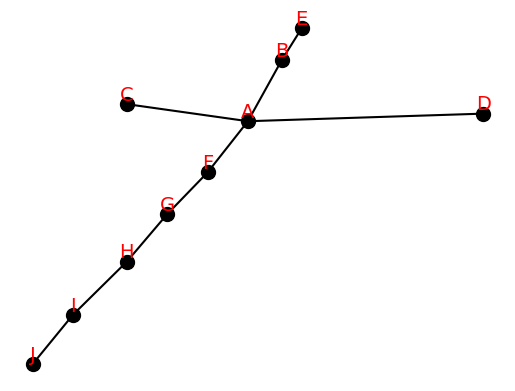

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8
4
2
2
2
4
4
4
4
2
{'CoOrdinatesOfVertices': [(32, 128), (37, 160), (14, 137), (67, 132), (40, 177), (26, 101), (20, 79), (14, 54), (6, 26), (0, 0)], 'verticeNames': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'edges': [{0, 1}, {0, 2}, {0, 3}, {0, 5}, {0, 1}, {1, 4}, {0, 2}, {0, 3}, {1, 4}, {0, 5}, {5, 6}, {5, 6}, {6, 7}, {6, 7}, {8, 7}, {8, 7}, {8, 9}, {8, 9}], 'edgeColor': {'(0,1)': 'blue', '(0,2)': 'blue', '(0,3)': 'blue', '(0,5)': 'blue', '(1,4)': 'blue', '(5,6)': 'blue', '(6,7)': 'blue', '(8,7)': 'blue', '(8,9)': 'blue'}, 'sphereColor': {'(0,1)': 'blue', '(0,2)': 'blue', '(0,3)': 'blue', '(0,5)': 'blue', '(1,4)': 'blue', '(5,6)': 'blue', '(6,7)': 'blue', '(8,7)': 'blue', '(8,9)': 'blue'}, 'textOnEdge': ['temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp'], 'toShowEdgeOrNot': ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

{'CoOrdinatesOfVertices': [(32, 128),
  (37, 160),
  (14, 137),
  (67, 132),
  (40, 177),
  (26, 101),
  (20, 79),
  (14, 54),
  (6, 26),
  (0, 0)],
 'verticeNames': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'edges': [{0, 1},
  {0, 2},
  {0, 3},
  {0, 5},
  {0, 1},
  {1, 4},
  {0, 2},
  {0, 3},
  {1, 4},
  {0, 5},
  {5, 6},
  {5, 6},
  {6, 7},
  {6, 7},
  {7, 8},
  {7, 8},
  {8, 9},
  {8, 9}],
 'edgeColor': {'(0,1)': 'blue',
  '(0,2)': 'blue',
  '(0,3)': 'blue',
  '(0,5)': 'blue',
  '(1,4)': 'blue',
  '(5,6)': 'blue',
  '(6,7)': 'blue',
  '(8,7)': 'blue',
  '(8,9)': 'blue'},
 'sphereColor': {'(0,1)': 'blue',
  '(0,2)': 'blue',
  '(0,3)': 'blue',
  '(0,5)': 'blue',
  '(1,4)': 'blue',
  '(5,6)': 'blue',
  '(6,7)': 'blue',
  '(8,7)': 'blue',
  '(8,9)': 'blue'},
 'textOnEdge': ['temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp',
  'temp'],
 'toShowEdgeOrNot': ['1',

In [9]:
def makeInitialInfo(adjacency_matrix):
  name=[]
  for i in range(len(adjacency_matrix)):
    name.append(chr(ord('A')+i))
  G = nx.from_numpy_array(adjacency_matrix)
  pos = nx.spring_layout(G)

  coordinates_list = []
  for node, coord in pos.items():
    coordinates_list.append((node, coord))
  print(pos)
  cord =[]
  min1=0
  min2=0
  for a in coordinates_list:
    print(a[1][0])
    cord.append((a[1][0],a[1][1]))
    if min1 > a[1][0]:
      min1 = a[1][0]
    if min2 > a[1][1]:
      min2 = a[1][1]
  print(cord)
  coord=[]
  for a in cord:
    coord.append((int(100*(a[0]+(-min1))),int(100*(a[1]+(-min2)))))
  print(coord)

  ij='0'
  hj=0
  coordinates={}
  for i, c in enumerate(coord, start=0):
      coordinates[i] = c
  print(coordinates)

  edges = []

  # Iterate over the adjacency matrix to find edges
  for i in range(len(adjacency_matrix)):
      for j in range(i+1, len(adjacency_matrix)):
          if adjacency_matrix[i][j] != 0:
              edge = (coordinates[i], coordinates[j])
              edges.append(edge)
  print("Edges:")
  for edge in edges:
      print(edge)

  lines = []
  print('-------------------------')
  print(len(edge))
  for tr in range(len(edges)):
    lines.append(edges[tr])
  print(lines)
  plt.figure()
  tempInt=-1
  for y in coord:
    tempInt=tempInt+1
    plt.scatter(y[0], y[1], s=100, color='black')
    plt.text(y[0], y[1],name[tempInt], fontsize=14, color='red', ha='center', va='bottom')
  for line in lines:
      x_values = [point[0] for point in line]
      y_values = [point[1] for point in line]
      plt.plot(x_values, y_values,color="black", marker=None)
      distance = np.sqrt((x_values[1] - x_values[0])**2 + (y_values[1] - y_values[0])**2)
      x_center = (x_values[0] + x_values[1]) / 2
      y_center = (y_values[0] + y_values[1]) / 2
      plt.text(x_center, y_center," ", ha='center', va='bottom')
  plt.axis('off')
  plt.show()
  tempEdgeInfo=[]
  noOfEdges=0
  for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
      if adjacency_matrix[i][j]!=0:
        tempEdgeInfo.append({i,j})
        noOfEdges=noOfEdges+1
  tempEdgeColor = {}
  tempTextOnEdge = {}
  TempToShowEdgeOrNot = {}
  for i in tempEdgeInfo:
    j=list(i)
    tempEdgeInfo1 = f'({j[0]},{j[1]})'
    tempEdgeColor[tempEdgeInfo1]="blue"
    tempTextOnEdge[tempEdgeInfo1] = 'None'
    TempToShowEdgeOrNot[tempEdgeInfo1] = '1'
  tempSphereColor = {}
  for i in coord:
    j=list(i)
    tempSphereInfo1 = f'({j[0]},{j[1]})'
    tempSphereColor[tempSphereInfo1] = 'black'
  tempRedList = ["red"] * noOfEdges
  tempTextOnEdge = ["temp"] * noOfEdges
  TempToShowEdgeOrNot = ['1'] * noOfEdges
  info = {
      "CoOrdinatesOfVertices" : coord ,
      "verticeNames" : name,
      "edges" : tempEdgeInfo,
      "edgeColor" : tempEdgeColor,
      "sphereColor" : tempEdgeColor,
      "textOnEdge" : tempTextOnEdge ,
      "toShowEdgeOrNot" : TempToShowEdgeOrNot
  }
  checkArray=[0] * (len(adjacency_matrix))
  print(checkArray)
  u=0
  m=0
  for i in adjacency_matrix:
    u=0
    for j in i:
      if j!=0:
        checkArray[u]=checkArray[u]+1
        checkArray[m]=checkArray[m]+1
      u=u+1
    m=m+1
  j=0
  for i in checkArray:
    print(i)
    if i==0:
      del info['CoOrdinatesOfVertices'][j]
    j=j+1
  print(info)
  return info
makeInitialInfo(matrix)

{0: array([0.31807098, 0.26469241]), 1: array([ 0.57549153, -0.0908383 ]), 2: array([0.34755571, 0.54803217]), 3: array([0.75486674, 0.5598469 ]), 4: array([ 0.69977695, -0.28965673]), 5: array([-0.025885  ,  0.19261236]), 6: array([-0.29327395,  0.08278464]), 7: array([-0.56407777, -0.12600272]), 8: array([-0.81252519, -0.41441444]), 9: array([-1.        , -0.72705629])}
0.31807098247328564
0.5754915330713234
0.34755570881863324
0.7548667440022703
0.699776947526239
-0.025885004362935126
-0.2932739512013175
-0.5640777653519748
-0.8125251949755268
-1.0
[(0.31807098247328564, 0.2646924062710449), (0.5754915330713234, -0.09083830346769597), (0.34755570881863324, 0.5480321670893319), (0.7548667440022703, 0.5598468991648122), (0.699776947526239, -0.289656725044897), (-0.025885004362935126, 0.19261236238185656), (-0.2932739512013175, 0.08278463931128682), (-0.5640777653519748, -0.1260027197339554), (-0.8125251949755268, -0.4144144402599505), (-1.0, -0.7270562857118341)]
[(131, 99), (157, 63)

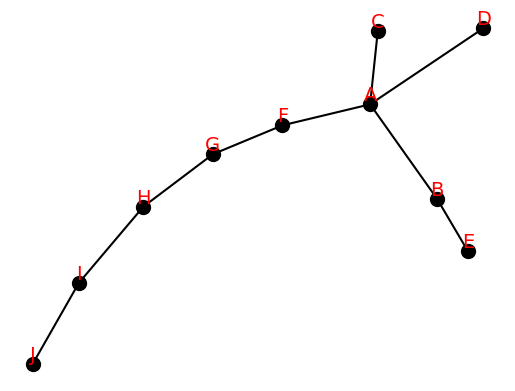

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8
4
2
2
2
4
4
4
4
2
{'CoOrdinatesOfVertices': [(131, 99), (157, 63), (134, 127), (175, 128), (169, 43), (97, 91), (70, 80), (43, 60), (18, 31), (0, 0)], 'verticeNames': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'edges': [{0, 1}, {0, 2}, {0, 3}, {0, 5}, {0, 1}, {1, 4}, {0, 2}, {0, 3}, {1, 4}, {0, 5}, {5, 6}, {5, 6}, {6, 7}, {6, 7}, {8, 7}, {8, 7}, {8, 9}, {8, 9}], 'edgeColor': {'(0,1)': 'blue', '(0,2)': 'blue', '(0,3)': 'blue', '(0,5)': 'blue', '(1,4)': 'blue', '(5,6)': 'blue', '(6,7)': 'blue', '(8,7)': 'blue', '(8,9)': 'blue'}, 'sphereColor': {'(0,1)': 'blue', '(0,2)': 'blue', '(0,3)': 'blue', '(0,5)': 'blue', '(1,4)': 'blue', '(5,6)': 'blue', '(6,7)': 'blue', '(8,7)': 'blue', '(8,9)': 'blue'}, 'textOnEdge': ['temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp'], 'toShowEdgeOrNot': ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 

In [27]:
'''
info = {
  vertices :
  name :
  edges :
  color :
  sphere color :
}
'''
def drawGraph(info):
  xvi=0
  tempInt=0
  for i, vertex in enumerate(info['CoOrdinatesOfVertices']):
    plt.scatter(vertex[0], vertex[1], s=100, color='red')
    plt.text(vertex[0], vertex[1], info['verticeNames'][tempInt], fontsize=14, color='black', ha='center', va='bottom')
    tempInt=tempInt+1
  tempInt=0
  for edge1 in info['edges']:
    edge = list(edge1)
    print(tempInt)
    x_values = [info['CoOrdinatesOfVertices'][edge[0]][0], info['CoOrdinatesOfVertices'][edge[1]][0]]
    y_values = [info['CoOrdinatesOfVertices'][edge[0]][1], info['CoOrdinatesOfVertices'][edge[1]][1]]
    tempEdgeInfo1 = f'({edge[0]},{edge[1]})'
    plt.plot(x_values, y_values, color = info['edgeColor'][tempEdgeInfo1], marker=None)
    x_center = (x_values[0] + x_values[1]) / 2
    y_center = (y_values[0] + y_values[1]) / 2
    plt.text(x_center, y_center," ", color='blue', ha='center', va='bottom')
    tempInt=tempInt+1
    '''
  for edge1, color in zip(info['edges'], info['edgeColor']):
    edge = list(edge1)
    print(tempInt)
    x_values = [info['CoOrdinatesOfVertices'][edge[0]][0], info['CoOrdinatesOfVertices'][edge[1]][0]]
    y_values = [info['CoOrdinatesOfVertices'][edge[0]][1], info['CoOrdinatesOfVertices'][edge[1]][1]]
    tempEdgeInfo1 = f'({edge[0]},{edge[1]})'
    plt.plot(x_values, y_values, color = info['edgeColor'][tempEdgeInfo1], marker=None)
    x_center = (x_values[0] + x_values[1]) / 2
    y_center = (y_values[0] + y_values[1]) / 2
    plt.text(x_center, y_center," ", color='blue', ha='center', va='bottom')
    tempInt=tempInt+1
    '''
  plt.axis('off')
  filename = f"graph_{xv}.png"  # Generate filename dynamically
  addXV()
  plt.savefig(filename)
  print(f"Saved graph as {filename}")
  files.download(filename)
  plt.show()
info = makeInitialInfo(matrix)
print(info)

[[], [], [], [], [], [], [], [], [], []]
{0: array([ 0.29078585, -0.03091772]), 1: array([ 0.49339363, -0.28828707]), 2: array([0.45996842, 0.02321461]), 3: array([0.52111501, 0.2810542 ]), 4: array([ 0.61367568, -0.42072957]), 5: array([0.00941715, 0.00635991]), 6: array([-0.20053672,  0.04246911]), 7: array([-0.45487704,  0.0838037 ]), 8: array([-0.73294198,  0.12957703]), 9: array([-1.        ,  0.17345581])}
0.29078584569374044
0.4933936327654456
0.45996841836592123
0.5211150127175399
0.6136756842471485
0.009417146101046554
-0.2005367157634358
-0.45487704108289134
-0.732941983044514
-1.0
[(0.29078584569374044, -0.030917717183268273), (0.4933936327654456, -0.2882870677424888), (0.45996841836592123, 0.023214607201801882), (0.5211150127175399, 0.28105419508211454), (0.6136756842471485, -0.4207295739173018), (0.009417146101046554, 0.0063599103496923114), (-0.2005367157634358, 0.04246910934154515), (-0.45487704108289134, 0.08380369987186788), (-0.732941983044514, 0.12957703165507345), (

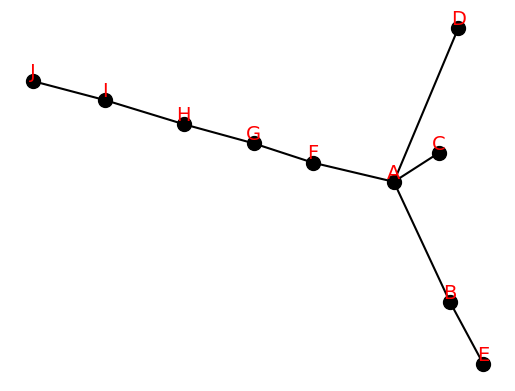

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8
4
2
2
2
4
4
4
4
2
{'CoOrdinatesOfVertices': [(129, 38), (149, 13), (145, 44), (152, 70), (161, 0), (100, 42), (79, 46), (54, 50), (26, 55), (0, 59)], 'verticeNames': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'edges': [{0, 1}, {0, 2}, {0, 3}, {0, 5}, {0, 1}, {1, 4}, {0, 2}, {0, 3}, {1, 4}, {0, 5}, {5, 6}, {5, 6}, {6, 7}, {6, 7}, {8, 7}, {8, 7}, {8, 9}, {8, 9}], 'edgeColor': {'(0,1)': 'blue', '(0,2)': 'blue', '(0,3)': 'blue', '(0,5)': 'blue', '(1,4)': 'blue', '(5,6)': 'blue', '(6,7)': 'blue', '(8,7)': 'blue', '(8,9)': 'blue'}, 'sphereColor': {'(0,1)': 'blue', '(0,2)': 'blue', '(0,3)': 'blue', '(0,5)': 'blue', '(1,4)': 'blue', '(5,6)': 'blue', '(6,7)': 'blue', '(8,7)': 'blue', '(8,9)': 'blue'}, 'textOnEdge': ['temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp'], 'toShowEdgeOrNot': ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

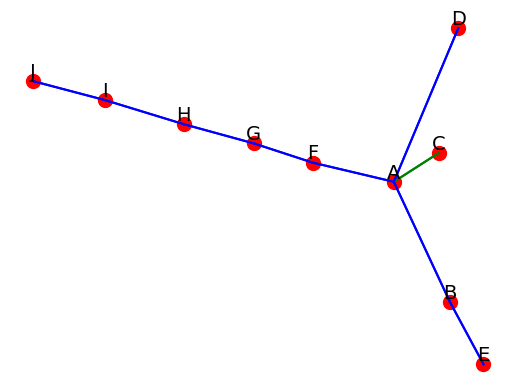

1
[[2], [], [0], [], [], [], [], [], [], []]
Cycle is present
{'(0,2)': 17, '(1,4)': 17, '(5,6)': 21, '(6,7)': 25, '(8,9)': 26, '(8,7)': 28, '(0,5)': 29, '(0,1)': 32, '(0,3)': 39}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Saved graph as graph_1.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

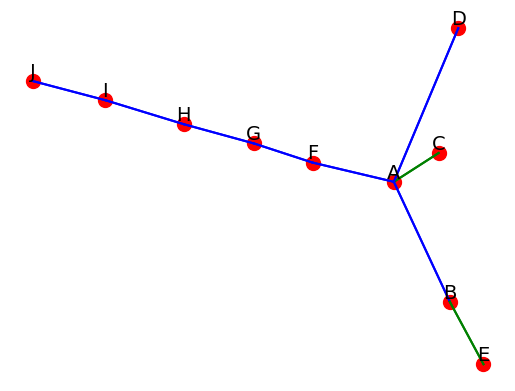

2
[[2], [4], [0], [], [1], [], [], [], [], []]
Cycle is present
{'(0,2)': 17, '(1,4)': 17, '(5,6)': 21, '(6,7)': 25, '(8,9)': 26, '(8,7)': 28, '(0,5)': 29, '(0,1)': 32, '(0,3)': 39}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Saved graph as graph_2.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

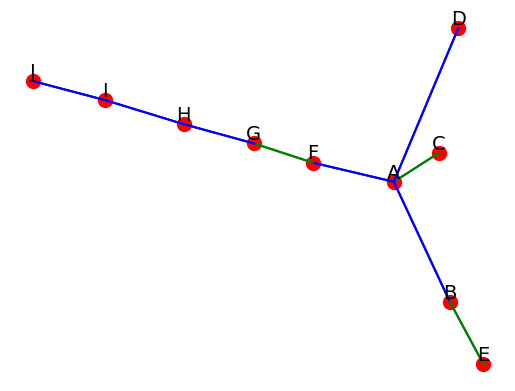

3
[[2], [4], [0], [], [1], [6], [5], [], [], []]
Cycle is present
{'(0,2)': 17, '(1,4)': 17, '(5,6)': 21, '(6,7)': 25, '(8,9)': 26, '(8,7)': 28, '(0,5)': 29, '(0,1)': 32, '(0,3)': 39}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Saved graph as graph_3.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

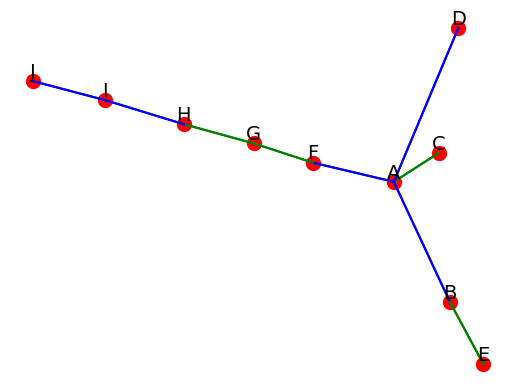

4
[[2], [4], [0], [], [1], [6], [5, 7], [6], [], []]
Cycle is present
{'(0,2)': 17, '(1,4)': 17, '(5,6)': 21, '(6,7)': 25, '(8,9)': 26, '(8,7)': 28, '(0,5)': 29, '(0,1)': 32, '(0,3)': 39}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Saved graph as graph_4.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

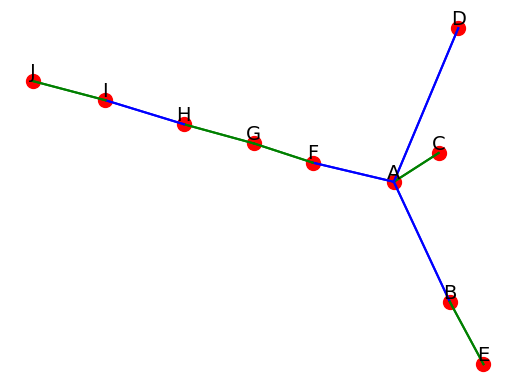

5
[[2], [4], [0], [], [1], [6], [5, 7], [6], [9], [8]]
Cycle is present
{'(0,2)': 17, '(1,4)': 17, '(5,6)': 21, '(6,7)': 25, '(8,9)': 26, '(8,7)': 28, '(0,5)': 29, '(0,1)': 32, '(0,3)': 39}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Saved graph as graph_5.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

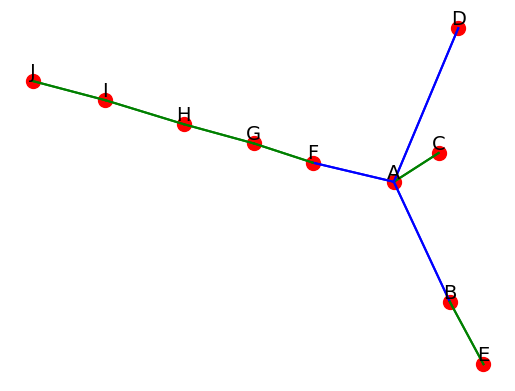

6
[[2], [4], [0], [], [1], [6], [5, 7], [6, 8], [9, 7], [8]]
Cycle is present
{'(0,2)': 17, '(1,4)': 17, '(5,6)': 21, '(6,7)': 25, '(8,9)': 26, '(8,7)': 28, '(0,5)': 29, '(0,1)': 32, '(0,3)': 39}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Saved graph as graph_6.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

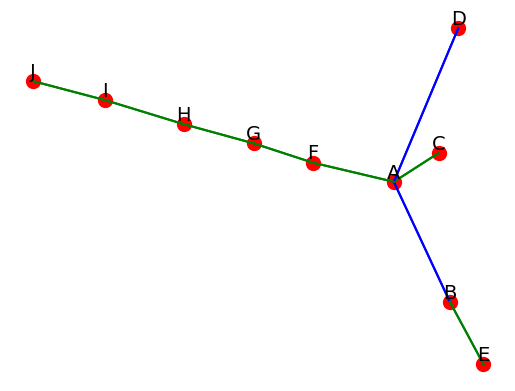

7
[[2, 5], [4], [0], [], [1], [6, 0], [5, 7], [6, 8], [9, 7], [8]]
Cycle is present
{'(0,2)': 17, '(1,4)': 17, '(5,6)': 21, '(6,7)': 25, '(8,9)': 26, '(8,7)': 28, '(0,5)': 29, '(0,1)': 32, '(0,3)': 39}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Saved graph as graph_7.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

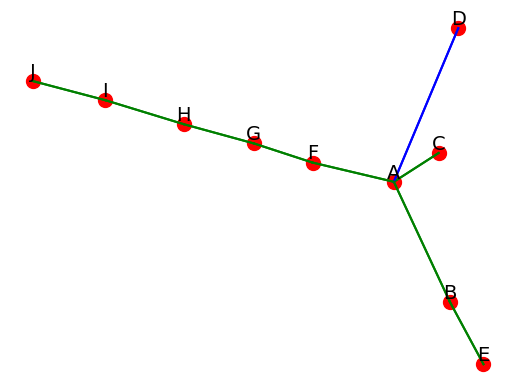

8
[[2, 5, 1], [4, 0], [0], [], [1], [6, 0], [5, 7], [6, 8], [9, 7], [8]]
Cycle is present
{'(0,2)': 17, '(1,4)': 17, '(5,6)': 21, '(6,7)': 25, '(8,9)': 26, '(8,7)': 28, '(0,5)': 29, '(0,1)': 32, '(0,3)': 39}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Saved graph as graph_8.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

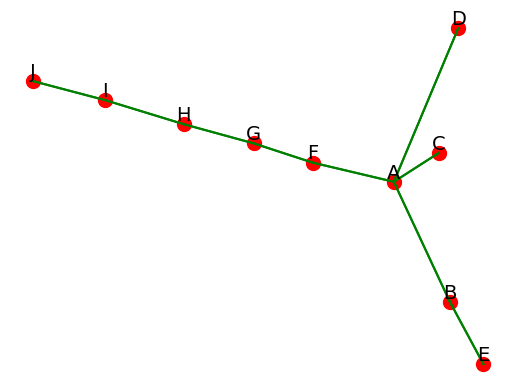

{'(0,2)': 17, '(1,4)': 17, '(5,6)': 21, '(6,7)': 25, '(8,9)': 26, '(8,7)': 28, '(0,5)': 29, '(0,1)': 32, '(0,3)': 39}


In [28]:
'''{'CoOrdinatesOfVertices': [(93, 53), (193, 82), (7, 60), (182, 16), (0, 0), (83, 28)],
 'verticeNames': ['A', 'B', 'C', 'D', 'E', 'F'],
 'edges': [{0, 1}, {0, 2}, {0, 3}, {0, 5}, {1, 3}, {2, 4}, {3, 5}, {4, 5}],
 'edgeColor': {'(0,1)': 'blue', '(0,2)': 'blue', '(0,3)': 'blue', '(0,5)': 'blue',
 '(1,3)': 'blue', '(2,4)': 'blue', '(3,5)': 'blue', '(4,5)': 'blue'},
 'sphereColor': {'(0,1)': 'blue', '(0,2)': 'blue', '(0,3)': 'blue', '(0,5)': 'blue', '(1,3)': 'blue', '(2,4)': 'blue', '(3,5)': 'blue', '(4,5)': 'blue'},
 'textOnEdge': ['temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp', 'temp'],
 'toShowEdgeOrNot': ['1', '1', '1', '1', '1', '1', '1', '1']}'''
def kruskal(matrix):
  list_of_all_nodes_we_can_visit_from_this_node=[]
  for i in range(len(matrix)):
    list_of_all_nodes_we_can_visit_from_this_node.append([])
  print(list_of_all_nodes_we_can_visit_from_this_node)
  info = makeInitialInfo(matrix)
  disOfEdges = {}
  for edge1 in info['edges']:
    edge = list(edge1)
    x_values = [info['CoOrdinatesOfVertices'][edge[0]][0], info['CoOrdinatesOfVertices'][edge[1]][0]]
    y_values = [info['CoOrdinatesOfVertices'][edge[0]][1], info['CoOrdinatesOfVertices'][edge[1]][1]]
    distance = int(np.sqrt((x_values[1] - x_values[0])**2 + (y_values[1] - y_values[0])**2))
    tempEdgeInfo = f'({edge[0]},{edge[1]})'
    disOfEdges[tempEdgeInfo]=distance
  tempDisOfEdges=disOfEdges
  disOfEdges = dict(sorted(tempDisOfEdges.items(), key=lambda item: item[1]))
  allVisited=0
  for key,value in disOfEdges.items():
    print(allVisited)
    if allVisited==len(info['verticeNames'])-1:
      print('tree is complete')
      break
    print(list_of_all_nodes_we_can_visit_from_this_node)
    isCycle=0
    list_of_all_nodes_we_can_visit_from_this_node[int(key[1])].append(int(key[3]))
    list_of_all_nodes_we_can_visit_from_this_node[int(key[3])].append(int(key[1]))
    tempInt=0
    for tempList in list_of_all_nodes_we_can_visit_from_this_node:
      if tempInt in tempList:
        print('Cycle is present')
        break
    print(disOfEdges)
    if isCycle==0:
      info['edgeColor'][key] = 'green'
      allVisited=allVisited+1
    drawGraph(info)
  print(disOfEdges)
  #drawGraph(info)

kruskal(matrix)